<a href="https://colab.research.google.com/github/msa1997/ads-2023/blob/main/ADS_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from Kaggle

### We load the dataset directly from Kaggle.


In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! echo "{\"username\":\"sadeghakbari\",\"key\":\"cc5ed3e2f4f1bb63ed4233176339a380\"}" > kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle datasets download -d sohier/calcofi

calcofi.zip: Skipping, found more recently modified local copy (use --force to force download)


'y' then 'enter'

In [3]:
!unzip /content/calcofi.zip

Archive:  /content/calcofi.zip
replace bottle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace cast.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# About the Dataset
About Dataset
Context
The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

## prediction goal?

predict the water temperature

# library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)

# Loading the Dataset

In [2]:
bottle = pd.read_csv("bottle.csv")
bottle.head(2)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


## remove equal to 	Temperature degrees C columns

In [4]:
bottle = bottle.drop(['R_POTEMP', 'R_TEMP'], axis=1)

# Getting Some Insights from Our Data
It is now time to do some EDA! We just play with different data columns to get more sense about our data.

plot the distribution of the target variable

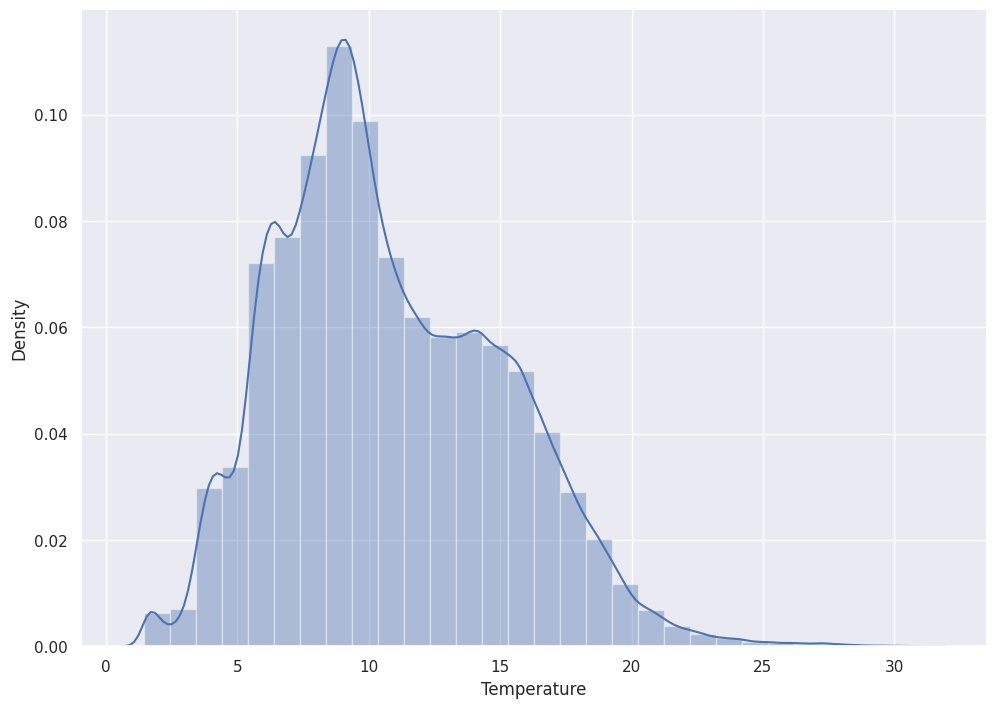

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bottle['T_degC'], bins=30)
plt.xlabel('Temperature')
plt.show()

find features have top correlation

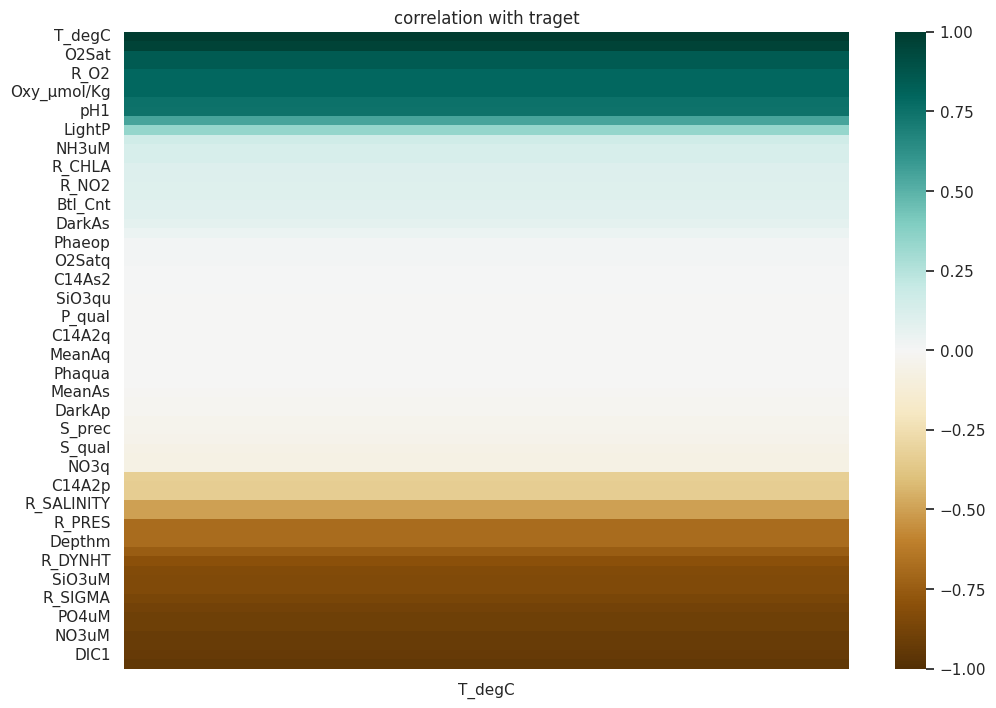

In [6]:
sns.heatmap(bottle.corr()[['T_degC']].sort_values(by='T_degC', ascending=False), vmin=-1, vmax=1, annot=False, cmap='BrBG')
plt.title('correlation with traget')
plt.show()

Let's visualize the correlation between columns:

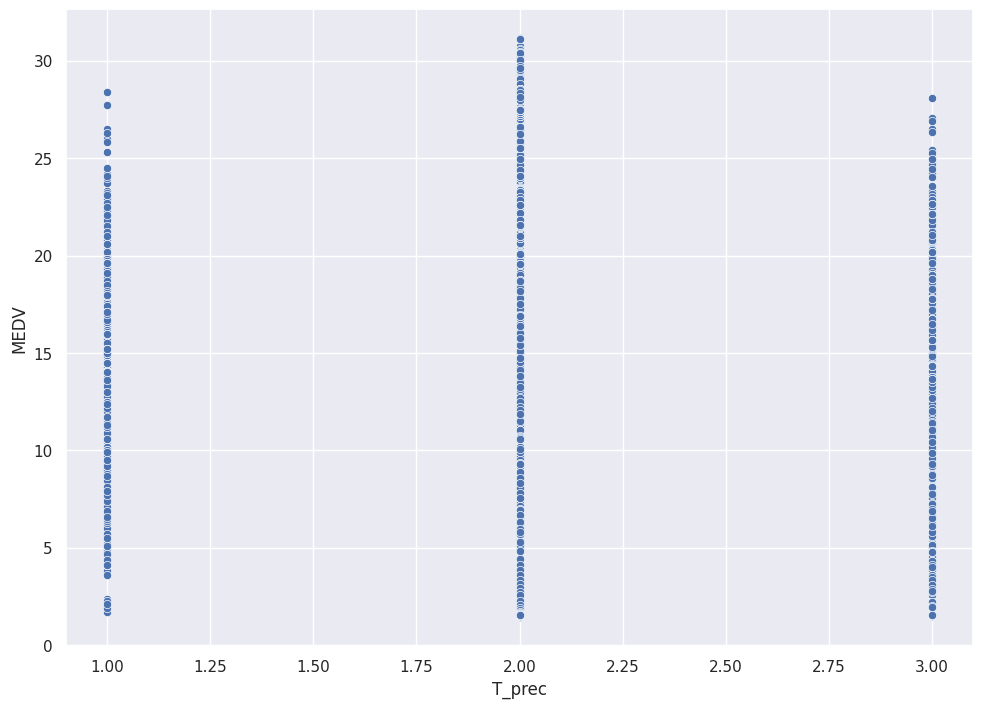

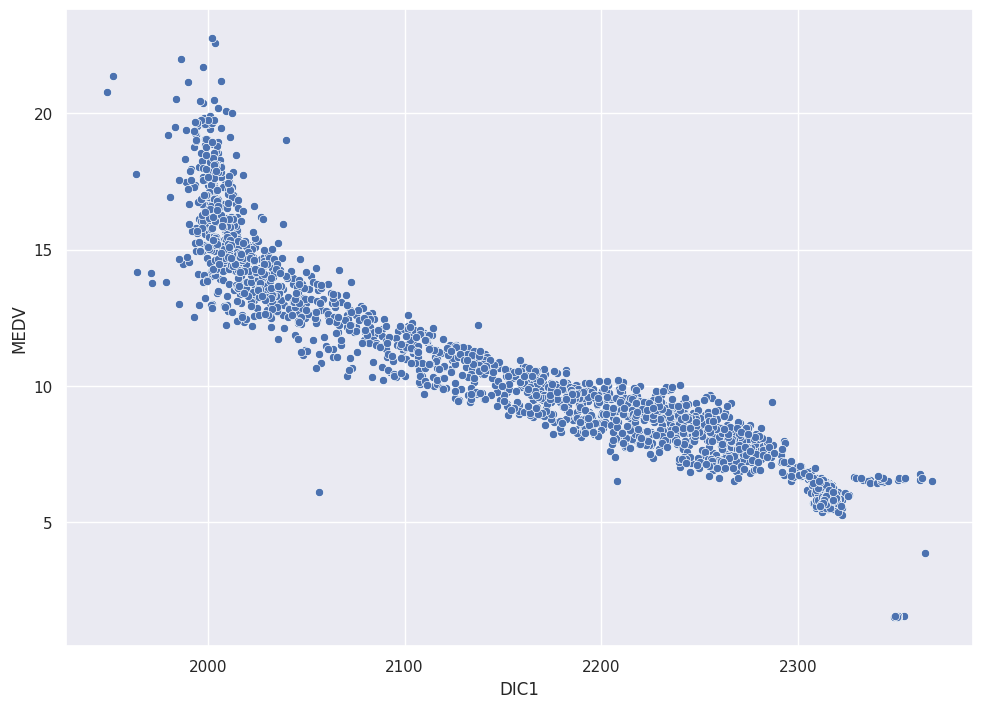

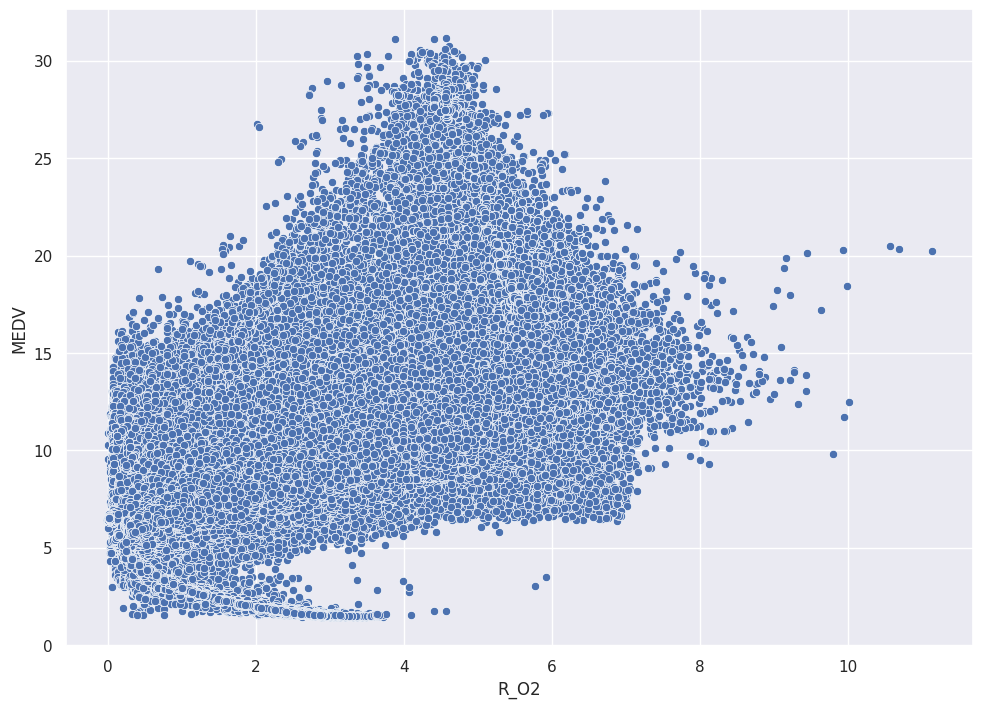

In [7]:
for col in ['T_prec', 'DIC1', 'R_O2']:
    sns.scatterplot(x=bottle[col], y=bottle['T_degC'], marker='o')
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

# Data Cleaning


the text type columns contain caption and ... so we should delete them from dataset

In [8]:
bottle = bottle.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

In [9]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


first drop rows with missing target value

In [10]:
bottle = bottle.dropna(subset='T_degC', axis=0)

In [11]:
bottle.fillna(method='ffill', inplace=True)

drop columns contain nul value

In [12]:
bottle = bottle.dropna(axis=1)

In [13]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,P_qual,...,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
count,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,...,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000
mean,17203.610834,434026.404796,228.503218,10.799677,33.835102,25.790608,4.701617,2.017148,2.694496,8.999989,...,8.999992,8.999992,8.999992,8.999992,228.503769,33.835015,25.786298,223.220943,0.429993,230.078442
std,10243.461239,249763.600730,316.870919,4.243825,0.467808,1.172082,1.876766,0.148498,0.460621,0.005623,...,0.002863,0.002863,0.002863,0.002863,316.870662,0.469947,1.130753,94.657276,0.390360,320.288945
min,1.000000,1.000000,0.000000,1.440000,28.431000,20.934000,3.000000,1.000000,2.000000,6.000000,...,8.000000,8.000000,8.000000,8.000000,0.000000,4.570000,20.934000,0.400000,0.000000,0.000000
25%,8345.000000,218426.750000,48.000000,7.680000,33.480000,24.917000,3.000000,2.000000,2.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,48.000000,33.480000,24.910000,144.200000,0.120000,48.000000
50%,16956.000000,434186.500000,125.000000,10.060000,33.850000,25.947000,3.000000,2.000000,3.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,125.000000,33.850000,25.940000,207.100000,0.331000,126.000000
75%,26659.000000,651360.250000,300.000000,13.880000,34.197000,26.639000,7.000000,2.000000,3.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,300.000000,34.197000,26.635000,303.900000,0.640000,302.000000
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,250.784000,7.000000,3.000000,3.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,5351.000000,37.034000,250.784000,683.400000,3.880000,5458.000000


#normalization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_scaling_columns = bottle.columns    # Specify the columns to scale using the min/max method


bottle[minmax_scaling_columns] = scaler.fit_transform(bottle[minmax_scaling_columns])
bottle[minmax_scaling_columns].describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,P_qual,...,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
count,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,...,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000
mean,0.500032,0.501844,0.042703,0.315141,0.628165,0.021129,0.425404,0.508574,0.694496,0.999996,...,0.999992,0.999992,0.999992,0.999992,0.042703,0.901461,0.021111,0.326239,0.110823,0.042154
std,0.297749,0.288790,0.059217,0.142890,0.054377,0.005099,0.469192,0.074249,0.460621,0.001874,...,0.002863,0.002863,0.002863,0.002863,0.059217,0.014476,0.004920,0.138590,0.100608,0.058682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242537,0.252556,0.008970,0.210101,0.586888,0.017329,0.000000,0.500000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.008970,0.890525,0.017298,0.210542,0.030928,0.008794
50%,0.492835,0.502029,0.023360,0.290236,0.629897,0.021810,0.000000,0.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.023360,0.901922,0.021779,0.302635,0.085309,0.023085
75%,0.774874,0.753137,0.056064,0.418855,0.670231,0.024821,1.000000,0.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.056064,0.912611,0.024803,0.444363,0.164948,0.055332
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Pareparing Train and Test Sets

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(bottle.drop(columns='T_degC'),bottle['T_degC'],test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(683120, 28)
(170780, 28)
(683120,)
(170780,)


# Regression

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()
lin_df.fit(X_train, y_train)

LinearRegression()

Now that our regression model is complete, let's check its score on the test set:

In [17]:
y_pred = lin_df.predict(X_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 94.7%


In [18]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.947


### Polynomial Regression
One way to expand on linear regression is to consider the polynomial combinations of different fatures, and in that, transforming our data into a higher-dimensional space. Then, we can perform the original linear regression in this space.



Paramete $c$ defines the degree of the polynomials, and its default value is 2.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 2)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("R2 Score for Test set: " +"{:.2}".format(r2))

R2 Score for Test set: 0.98


# Logistic Regression (on modified target)


make continuous value to categorical labels

In [16]:
m = y_train.mean()
encoded_y_train = y_train > m

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
logi = LogisticRegression(penalty='none',max_iter=100)
logi.fit(X_train, encoded_y_train)

LogisticRegression(penalty='none')

In [28]:
encoded_y_test = y_test > m

In [29]:
y_pred = logi.predict(X_test)                                     # Predict logistic Model
accuracy_score = logi.score(X_test, encoded_y_test)                       # Accuracy score
print("logistic Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

logistic Regression Model Accuracy Score: 97.6%


Now let's measure the accuracy:

In [43]:
print("R2 Score: " +"{:.3}".format(r2_score(encoded_y_test.astype(int), y_pred.astype(int))))

R2 Score: 0.903


# Regularized Regression
So far, we have seen how to perform various forms of regression on our data. However, in some of the cases we saw above the weights were very large in order for the algorithm to improve the prediction accuracy.


### Ridge Regression
When we penalize the norm-2 of the weights in the linear regression problem, we end up with reidge regression

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
predicted_prices_train = model.predict(X_train)
predicted_prices_test = model.predict(X_test)

In [ ]:
R2_score_test = r2_score(y_test, predicted_prices_test)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.923


### LASSO Regression
If we put a penalty on the absolute value of weights, instead of their squared value, we will have LASSO regression

In [20]:
from sklearn.linear_model import Lasso

In [34]:
las = Lasso(alpha=0.0001)
las.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [35]:
y_pred = las.predict(X_test)                                     # Predict lasso Model
accuracy_score = las.score(X_test, y_test)                       # Accuracy score
print("lasso Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

lasso Regression Model Accuracy Score: 91.8%


In [36]:
from sklearn.metrics import mean_squared_error,r2_score
print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)))

R2 Score: 0.918


# Kernel Regression
Polynomial regression is a special form of kernel-based regression. More generally, we can apply any nonlinear transformation suitable to our problem to transfer our data to a (usually) higher-dimensional space. Then, we can perform linear regression in this space.


[!!!!!!! it may use all ram make sure colab ram is almost free befor run ]

you get ram overflow if you use all data if you want all data use colab pro

---

In [ ]:
if 1:
  from sklearn.kernel_ridge import KernelRidge
  ker = KernelRidge(alpha=0,kernel='polynomial',degree=1)
  ker.fit(X_train[:10000], y_train[:10000])

In [ ]:
y_pred = ker.predict(X_test[:10000])                                     # Predict kernel Model
accuracy_score = ker.score(X_test[:10000], y_test[:10000])                       # Accuracy score
print("kernel Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

In [22]:
from sklearn.metrics import mean_squared_error,r2_score
R2_score_test = r2_score(y_test[:10000], y_pred)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.949


# Question

explain kernel trick in a few sentences and how it can be helpful in achieving better regression results.


In machine learning, the kernel trick is a technique for mapping data to a higher-dimensional space, where it becomes easier to learn nonlinear relationships between the data points. This is particularly useful for regression tasks, where the goal is to predict a continuous target variable.

A kernel function is used in kernel regression to gauge the similarity between data points. Data points that are closer together in the original space are given a higher weight by the kernel function, while data points that are farther apart are given a lower weight. This allows the regression model to discover a more intricate relationship between the data points, which can enhance performance on nonlinear regression tasks.